source: https://kenbenoit.net/assets/courses/ME104/logmodels2.pdf

WBdata API:
    https://wbdata.readthedocs.io/en/stable/
    https://pypi.org/project/world-bank-data/

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/7e/U.S._Phillips_Curve_2000_to_2013.png/800px-U.S._Phillips_Curve_2000_to_2013.png" height=600>

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
wb_regions = ['Arab World', 'Caribbean small states',
              'Central Europe and the Baltics', 'Early-demographic dividend',
              'East Asia & Pacific', 'East Asia & Pacific (excluding high income)',
              'East Asia & Pacific (IDA & IBRD countries)',
              'Euro area', 'Europe & Central Asia',
              'Europe & Central Asia (excluding high income)',
              'Europe & Central Asia (IDA & IBRD countries)',
              'European Union',
              'Fragile and conflict affected situations',
              'Heavily indebted poor countries (HIPC)',
              'High income',
              'IBRD only',
              'IDA & IBRD total',
              'IDA blend',
              'IDA only',
              'IDA total',
              'Late-demographic dividend',
              'Latin America & Caribbean',
              'Latin America & Caribbean (excluding high income)',
              'Latin America & the Caribbean (IDA & IBRD countries)',
              'Least developed countries',
              'Least developed countries: UN classification',
              'Low & middle income',
              'Low income',
              'Lower middle income',
              'Middle East & North Africa',
              'Middle East & North Africa (excluding high income)',
              'Middle East & North Africa (IDA & IBRD countries)',
              'Middle income',
              'North America',
              'Not classified',
              'OECD members',
              'Other small states',
              'Pacific island small states',
              'Post-demographic dividend',
              'Pre-demographic dividend',
              'Small states',
              'South Asia',
              'South Asia (IDA & IBRD)',
              'Sub-Saharan Africa',
              'Sub-Saharan Africa (excluding high income)',
              'Sub-Saharan Africa (IDA & IBRD countries)',
              'Upper middle income',
              'World']

In [3]:
import wbdata
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd
import statsmodels.api as sm

    Inflation --> FP.CPI.TOTL.ZG
    Unemployment national estimate --> SL.UEM.TOTL.NE.ZS

In [ ]:
wbdata.search_indicators()

In [ ]:
wbdata.get_data()

In [4]:
raw_Y_dict = wbdata.get_data('FP.CPI.TOTL.ZG')
Y_dict = {}
for X in raw_Y_dict:    
    date = X['date']
    country = X['country']['value']
    if country not in Y_dict.keys() and country not in wb_regions:
        Y_dict[country] = {}
    else:
        pass
    try:
        value = float(X['value'])
        Y_dict[country][date] = value
    except:
        pass

In [5]:
raw_X_dict = wbdata.get_data('SL.UEM.TOTL.NE.ZS')
X_dict = {}
for X in raw_X_dict:    
    date = X['date']
    country = X['country']['value']
    if country not in X_dict.keys() and country not in wb_regions:
        X_dict[country] = {}
    else:
        pass
    try:
        value = float(X['value'])
        X_dict[country][date] = value
    except:
        pass

In [6]:
def scatterplot_X_Y(X, Y, title, X_title, Y_title, plot_regression=False):
    fig = plt.figure(figsize=(10, 10))
    plt.title(title, fontsize=20)
    plt.xlabel(X_title, fontsize=20)
    plt.ylabel(Y_title, fontsize=20)
    plt.plot(X, Y, 'o', markersize=5, color='red')
    min_x = min(X)
    min_y = min(Y)
    max_x = max(X)
    max_y = max(Y)
    if plot_regression:
        X = sm.add_constant(X)
        model = sm.OLS(Y, X).fit()
        beta_0 = model.params.tolist()[0]
        beta_1 = model.params.tolist()[1]
        R2 = model.rsquared
        print(model.summary())
        plt.plot([0, max_x], [beta_0, beta_0 + (beta_1 * max_x)], color='black', linestyle='solid', linewidth=2)
        plt.title('R2: ' + str(R2), fontsize=20, fontweight='bold')
        plt.xlim(min_x, max_x)
        plt.ylim(min_y, max_y)
    plt.show()
    plt.close(plt.gcf())

In [32]:
country = 'United States'
X = []
Y = []
if country in X_dict.keys():
    Xs = X_dict[country]
    Ys = Y_dict[country]
    for year in Xs.keys():
        if year in Ys.keys() and int(year) >= 2000:
            x = X_dict[country][year]
            y = Y_dict[country][year]
            X.append(x)
            Y.append(y)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     2.961
Date:                Wed, 29 Jan 2020   Prob (F-statistic):              0.103
Time:                        21:39:53   Log-Likelihood:                -26.784
No. Observations:                  19   AIC:                             57.57
Df Residuals:                      17   BIC:                             59.46
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.6066      0.858      4.204      0.0

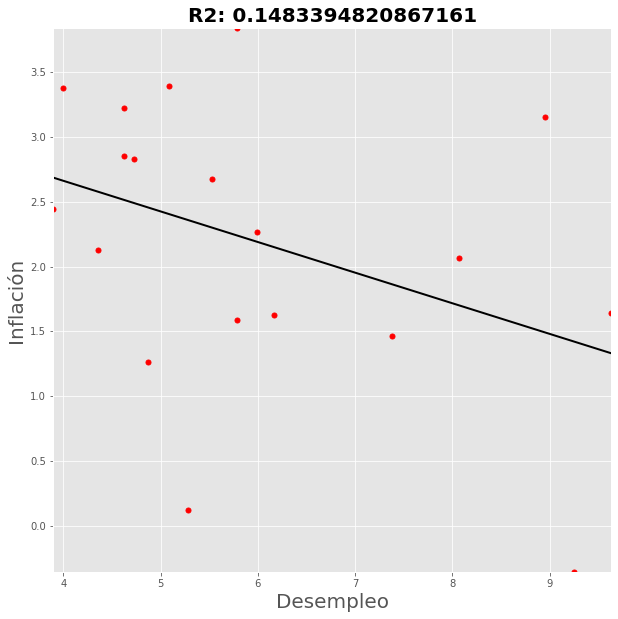

In [33]:
scatterplot_X_Y(X, Y, 'Philips Curve: ' + country, 'Desempleo', 'Inflación', True)

# Finite Distributed Lag Models

In [36]:
import numpy as np 
import sqlalchemy
import pandas as pd
from pymongo import MongoClient
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.patches import Rectangle

In [37]:
def download_data(database, table):
    '''
     |
     |  Returns a dataframe directly from
     |  entropy's API.
     |
     |
     |  Inputs:
     |  -- database name
     |
     |  -- table name 
     |
     |
     |  Output:
     |  -- dataframe
     |
     |  --------------------------------------------
     |  * see names in:
     |    https://entropy-developers.herokuapp.com/ 

 
    '''
    username = 'entropy_scholar'
    password = 'OCN4kEzbsW5lqQ2W'
    url = 'mongodb+srv://{}:{}@entropy-sfneo.mongodb.net/test?retryWrites=true&w=majority'.format(username, password)
    client = MongoClient(url)
    db = client[database]
    collection = db[table]
    df = pd.DataFrame(list(collection.find())).drop('_id', axis=1)
    return df

In [136]:
precio_mx_oil = download_data('oilmonster', 'oil_mexican_basket_price')
precio_mx_oil = precio_mx_oil.sort_values(by=['date'])
precio_mx_oil = precio_mx_oil.reset_index(drop=True)

In [111]:
precio_wt_oil = download_data('oilmonster', 'oil_west_texas_intermediate_price')
precio_wt_oil = precio_wt_oil.sort_values(by=['date'])
precio_wt_oil = precio_wt_oil.reset_index(drop=True)

In [112]:
oil_prices = precio_wt_oil.merge(precio_mx_oil, on='date')
oil_prices = oil_prices.set_index('date')

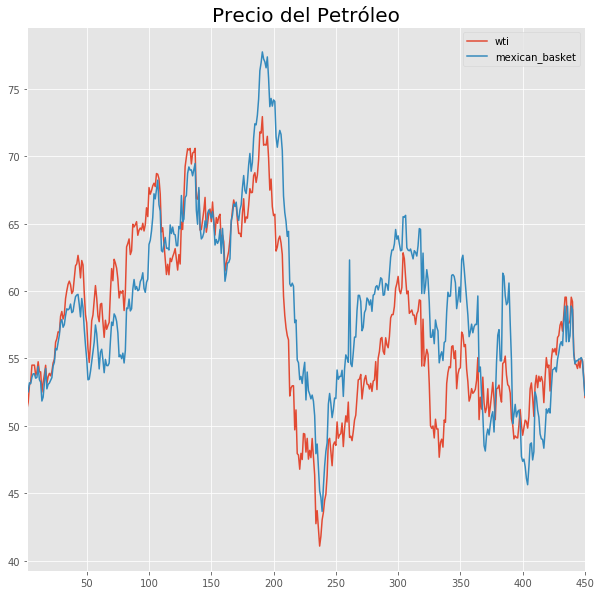

In [135]:
fig = plt.figure(figsize=(10, 10))
plt.title('Precio del Petróleo', fontsize=20)
oil_prices['wti'].plot()
oil_prices['mexican_basket'].plot()
plt.legend()
plt.show()
plt.close(plt.gcf())

In [114]:
oil_prices = oil_prices.reset_index()
wti_lagged_1 = []
wti_lagged_2 = []
for i in range(len(oil_prices)):
    try:
        wti_1 = oil_prices['wti'][i - 1]
        wti_2 = oil_prices['wti'][i - 2]
    except:
        wti_1 = np.nan
        wti_2 = np.nan 
    wti_lagged_1.append(wti_1)
    wti_lagged_2.append(wti_2)
oil_prices['wti_lagged_1'] = wti_lagged_1
oil_prices['wti_lagged_2'] = wti_lagged_2

In [115]:
oil_prices = oil_prices.dropna(axis=0, how='any')

In [116]:
X = oil_prices[['wti_lagged_1', 'wti_lagged_2']]
Y = oil_prices['mexican_basket']
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         mexican_basket   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     514.9
Date:                Wed, 29 Jan 2020   Prob (F-statistic):          1.29e-116
Time:                        23:19:31   Log-Likelihood:                -1209.1
No. Observations:                 449   AIC:                             2424.
Df Residuals:                     446   BIC:                             2437.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           11.1178      1.499      7.415   

In [117]:
import random

In [118]:
X

,const,wti_lagged_1,wti_lagged_2
2,1.0,52.25,53.25
3,1.0,51.25,52.25
4,1.0,51.75,51.25
5,1.0,53.00,51.75
6,1.0,53.25,53.00
...,...,...,...
446,1.0,54.84,54.25
447,1.0,54.30,54.84
448,1.0,55.03,54.30
449,1.0,54.82,55.03


In [129]:
X_test_1 = []
X_test_2 = []
for i in range(20):
    random_price_1 = random.randint(50, 60)
    random_price_2 = random.randint(50, 60)
    X_test_1.append(random_price_1)
    X_test_2.append(random_price_2)
X_test = pd.DataFrame({'X_test_1': X_test_1,
                       'X_test_2': X_test_2})

In [130]:
X_test = sm.add_constant(X_test)

In [131]:
model.predict(X_test)

0     54.341008
1     56.243371
2     59.632564
3     56.540737
4     58.859932
5     53.330743
6     60.227296
7     58.978099
8     54.103375
9     55.233106
10    57.492568
11    58.919664
12    54.995473
13    59.454663
14    52.736011
15    59.870197
16    57.789934
17    54.638374
18    54.638374
19    56.243371
dtype: float64

In [132]:
wti_new = list(oil_prices['wti']) + [np.nan] * len(X_test)
mexican_basket_new = list(oil_prices['mexican_basket']) + [np.nan] * len(X_test)
predict_new = ([np.nan] * len(oil_prices)) + list(model.predict(X_test))
oil_prices_2 = pd.DataFrame({'wti_new': wti_new, 'mexican_basket_new': mexican_basket_new, 'predict_new': predict_new})

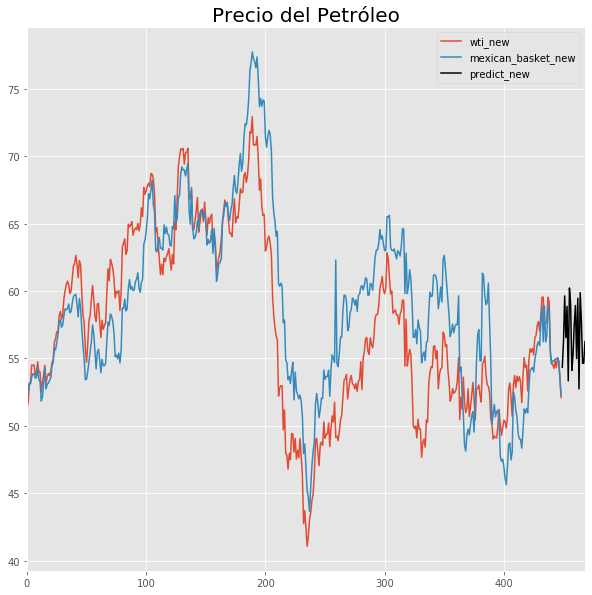

In [134]:
fig = plt.figure(figsize=(10, 10))
plt.title('Precio del Petróleo', fontsize=20)
oil_prices_2['wti_new'].plot()
oil_prices_2['mexican_basket_new'].plot()
oil_prices_2['predict_new'].plot(color='black')
plt.legend()
plt.show()
plt.close(plt.gcf())